# ICA on Peak Patch Fields

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

import sys
import os

import importlib
from importlib.util import spec_from_loader, module_from_spec
from importlib.machinery import SourceFileLoader 

from pathlib import Path

"""
Independent Component Analysis

sklearn module contains contains a FastICA capability. We can chose the cost function (measure of non-Gaussianity): 
cube for kurtosis and logcosh for negentropy approximation.
"""
from sklearn.decomposition import FastICA

In [2]:
#####################################
#### Get path to parameters file ####
#####################################
########
## In final implementation, will have to take path
## to ppatch runs as input
########

####
## Potentially useful code:
####
# ppatchruns_dir = os.path.join( script_dir, '..', 'alpha', 'beta' ) # Joins different paths together
# Path("path/to/file.txt").touch() # Creates new empty file.txt (can create other files similarly)



# Get path to current file's dir
current_path = Path().absolute()

# Get path to current file's parent dir
# parent_path = current_path.parent

# Path to relevant realization
realization_path = current_path/'peak-patch-runs/n1024bigR/z2/fnl1e6/'

# Path to params file
param_file_path = realization_path/'param/param.params'

# Path to dir of relevant field realizations
fields_path = realization_path/'fields'



#
# Append params dir path (to sys path???);
# example: need to import module.py present in '/path/to/python/module/not/in/syspath'
#
# This is ultimately not be needed given the module-loading code below,
# but keeping it here if needed at some point.
#
# sys.path.append(param_dir_path)



#
# This piece of code loads the parameters file, param.params;
# Needed to do it this way because of multiple subdirectories
# in the tree and the period/dot in the name "param.params".
# Would have had to create __init__.py files in each subdir
# otherwise.
#
# Got it from: 
# https://csatlas.com/python-import-file-module/#import_any_file_including_non_py_file_extension_python_3_4_and_up
#
loader = SourceFileLoader( 'param.params' , str(param_file_path))
spec = spec_from_loader( 'param.params', loader )
param = module_from_spec( spec )
loader.exec_module( param )

# Save the module "param" with its full name containing the most imp. params.
# This allows importing "param" directly with the full name.
# The full name is "SideLengthInMpc_SideLengthOfArray_BufferThickness_"
sys.modules['17Mpc_n1024_nb64_nt1.params'] = param

In [3]:
# This is for a correlated non-gaussianity run using ???.


# Side length of the cubic simulation volume
s = param.boxsize # in Mpc/h

# Side length of field arrays
n = param.nmesh

# Buffer thickness
nbuff = param.nbuff

print('Side length (Mpc): ', s, '\nSide length (array units): ', n, '\nBuffer thickness (array units): ', nbuff)

Side length (Mpc):  17.92 
Side length (array units):  1024 
Buffer thickness (array units):  64


In [4]:
# Gaussian delta field
delta_g_file = fields_path/'Fvec_17Mpc_n1024_nb64_nt1'
in_delta_g   = open(delta_g_file, 'rb')

# non-Gaussian delta field
delta_file = fields_path/'Fvec_fNL_17Mpc_n1024_nb64_nt1'
in_delta   = open(delta_file, 'rb')


# Gaussian zeta field
zeta_g_file = fields_path/'zetag_17Mpc_n1024_nb64_nt1'
in_zeta_g   = open(zeta_g_file, 'rb')

# non-Gaussian zeta field
zeta_file = fields_path/'zetang_17Mpc_n1024_nb64_nt1'
in_zeta   = open(zeta_file, 'rb')

In [5]:
# Read in delta_g, reshape it into an nxnxn, and then trim off buffers
delta_g = np.fromfile(in_delta_g,dtype=np.float32,count=-1) 
delta_g = np.reshape(delta_g, (n,n,n), order='F')
delta_g = delta_g[nbuff:-nbuff,nbuff:-nbuff,nbuff:-nbuff]

In [6]:
# Read in delta, reshape it into an nxnxn, and then trim off the buffers
delta = np.fromfile(in_delta,dtype=np.float32,count=-1)
delta = np.reshape(delta, (n,n,n), order='F')
delta = delta[nbuff:-nbuff,nbuff:-nbuff,nbuff:-nbuff]

In [7]:
#
# Extracting nonG delta in two halves
#

# sideN = delta.shape[0]
# sideNh = int(sideN/2)
# delta_ng = np.empty_like(delta)
# delta_ng[0:sideNh,0:sideNh,0:sideNh] = delta[0:sideNh,0:sideNh,0:sideNh] - delta_g[0:sideNh,0:sideNh,0:sideNh]
# delta_ng[sideNh:sideN, sideNh:sideN, sideNh:sideN] = delta[sideNh:sideN, sideNh:sideN, sideNh:sideN] - delta_g[sideNh:sideN, sideNh:sideN, sideNh:sideN]
# print(delta_ng[0,0,0])

In [8]:
# Read in zeta_g, reshape it into an nxnxn, and then trim off buffers
zeta_g = np.fromfile(in_zeta_g,dtype=np.float32,count=-1)
zeta_g = np.reshape(zeta_g, (n,n,n), order='F')
zeta_g = zeta_g[nbuff:-nbuff,nbuff:-nbuff,nbuff:-nbuff]

In [9]:
# Read in zeta, reshape it into an nxnxn, and then trim off the buffers
zeta = np.fromfile(in_zeta,dtype=np.float32,count=-1)
zeta = np.reshape(zeta, (n,n,n), order='F')
zeta = zeta[nbuff:-nbuff,nbuff:-nbuff,nbuff:-nbuff]

In [10]:
# nonG component of Delta
delta_ng = delta - delta_g 

# nonG component of Zeta
zeta_ng = zeta - zeta_g 

In [11]:
print('Delta Gauss-comp (0, 0, 0):      ', delta_g[0,0,0])
print('\nDelta nonG-comp (0, 0, 0):     ', delta_ng[0,0,0])
print('\nDelta total (0, 0, 0):         ', delta[0,0,0])

print('\n\nZeta Gauss-comp (0, 0, 0):       ', zeta_g[0,0,0])
print('\nZeta nonG-comp (0, 0, 0):      ', zeta_ng[0,0,0])
print('\nZeta total (0, 0, 0):          ', zeta[0,0,0])

Delta Gauss-comp (0, 0, 0):       -6.0581393

Delta nonG-comp (0, 0, 0):      -108957.03

Delta total (0, 0, 0):          -108963.086


Zeta Gauss-comp (0, 0, 0):        4.5570557e-12

Zeta nonG-comp (0, 0, 0):       7.312468e-12

Zeta total (0, 0, 0):           1.18695245e-11


In [12]:
# # Defines X,Y,Z as meshgrid
# edges = np.linspace( -s/2 , s/2 , n+1 )
# X,Y,Z = np.meshgrid(edges,edges,edges,indexing='ij')


#############################################################################################################################
## You now have zeta_g, delta_g, and delta, which are three n-by-n-by-n NumPy arrays representing a gaussian zeta field, a ##
## gaussian density field (specifically rho bar times delta, that we talked about today) and a non-gaussian delta field.   ##
#############################################################################################################################

### You now have zeta_g, delta_g, and delta, which are three n-by-n-by-n NumPy arrays representing a gaussian zeta field, a gaussian density field (specifically rho bar times delta) and a non-gaussian delta field.

In [13]:
# Take out 1D strips from the mesh fields

xcoord = 20
ycoord = 20

delta_g_1d = delta_g[xcoord,ycoord,:] # 1d Delta field - Gaussian
delta_1d = delta[xcoord,ycoord,:]
delta_ng_1d = delta_ng[xcoord,ycoord,:] # 1d Delta field - nonG


xcoord = 20
ycoord = 20

zeta_g_1d = zeta_g[xcoord,ycoord,:]*1000000 # 1d Zeta field - Gaussian
zeta_1d = zeta[xcoord,ycoord,:]*1000000
zeta_ng_1d = zeta_ng[xcoord,ycoord,:]*1000000 # 1d Zeta field - nonG

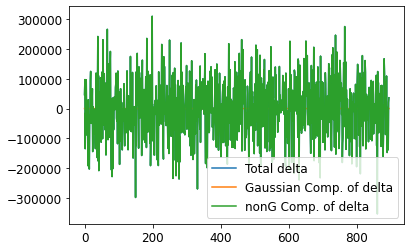

In [14]:
plt.plot(delta_1d, label='Total delta')
plt.plot(delta_g_1d, label='Gaussian Comp. of delta')
plt.plot(delta_ng_1d, label='nonG Comp. of delta')


plt.legend()

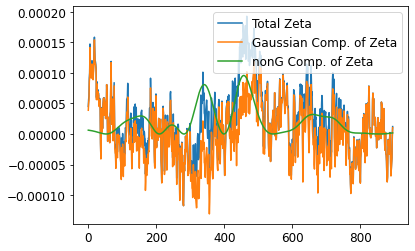

In [15]:

plt.plot(zeta_1d, label='Total Zeta')
plt.plot(zeta_g_1d, label='Gaussian Comp. of Zeta')
plt.plot(zeta_ng_1d, label='nonG Comp. of Zeta')

# plt.ylim([-1, 1])
plt.legend()

## <u>Sklearn's FastICA implementation</u>
<b> For fully determined ICA separation.
<br>
Sklearn's implementation does not allow for underdetermined separation. </b>

### Setup

In [16]:
"""
source_noise    :   grf generated using gaussianfield [in Notebook Setup above]
source_nonG     :   returns n columns corresponding to n gaussian peaks that are shifted by xPeak/xc relative to 0 (and scaled by the size of the field)
source_comps    :   array of source component arrays
num_comps       :   num of different source signals/components, i.e. GRF & no. of peaks
num_samples     :   num of observations (has to be >= num_comps)
mix_matrix      :   mixing matrix generated randomly with entries over [0.5, 1)
mix_signal_pre  :   resulting mixed/observed signals (not prewhitened)
"""

source_noise = zeta_g_1d # Gaussian random noise
source_nonG = zeta_ng_1d

source_comps = np.vstack([source_noise, source_nonG]) 
num_comps = source_comps.shape[0]
num_samples = num_comps

mix_matrix = (1+np.random.random((num_samples, num_comps)))/2.0 
print(mix_matrix.shape)
mix_signal_pre = np.dot(mix_matrix, source_comps) # mixed signals
print(mix_signal_pre.shape)

(2, 2)
(2, 896)


### Sklearn--Fully determined FastICA separation

#### Apply Sklearn's $\texttt{FastICA}$

In [23]:
# initialize FastICA with given params
# Logcosh is negentropy.
ica = FastICA(n_components=num_comps, algorithm='deflation', max_iter=10000, 
        tol=1e-7, fun='logcosh')

# run FastICA on observed (mixed) signals
sl = ica.fit_transform(mix_signal_pre.T) # run FastICA on observed signals

In [24]:
# ica = FastICA(n_components=num_comps, algorithm='deflation', max_iter=100, tol=1e-4, fun='cube')
# sc = ica.fit_transform(mix_signal_pre.T)

In [27]:
source_max  = np.abs(source_comps).max()
ica_max     = np.abs(sl).max()
print(source_max)
print(ica_max)
sl          = -sl * ( source_max / ica_max )
ica_max     = np.abs(sl).max()
print(ica_max)

0.0001540605559791075
0.0001540605559791075
0.0001540605559791075


#### Plot the following:
#### (1) Observed signals (random mixtures of source components),
#### (2) Source components,
#### (3) ICA separated signals.

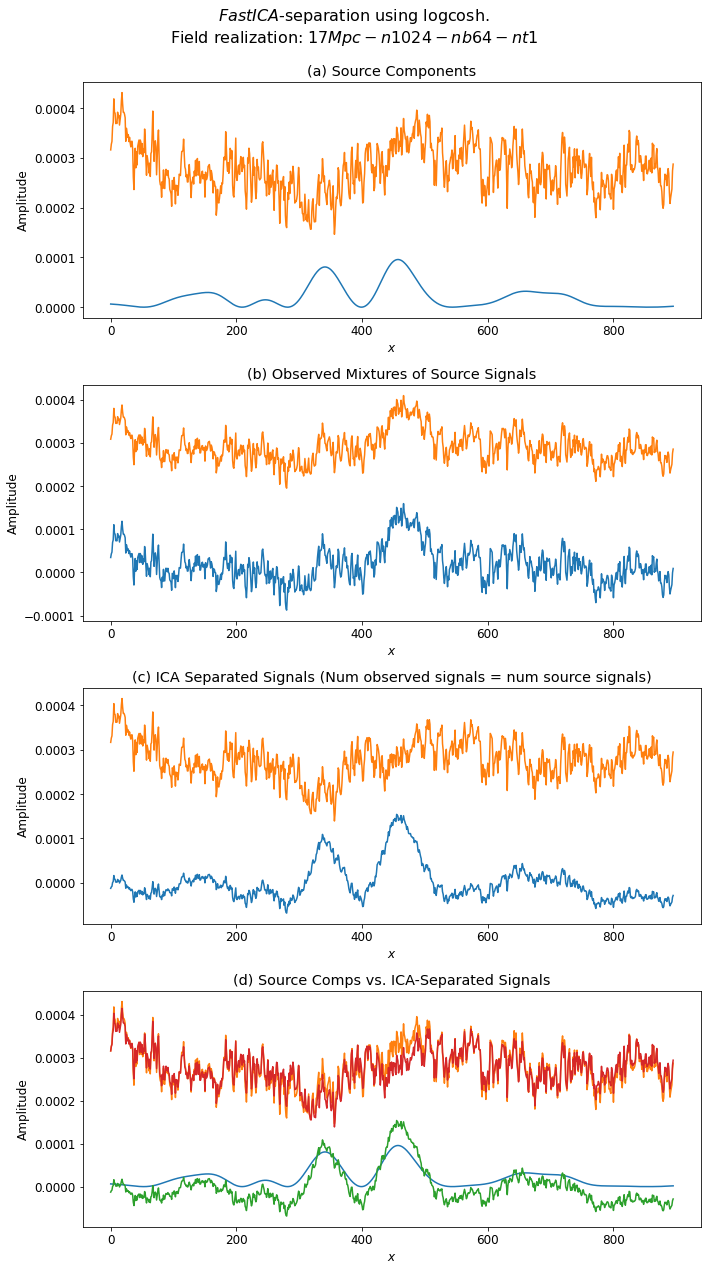

In [31]:
fig, ax = plt.subplots(4,1,figsize=(10,18))

scomps = np.flip(source_comps, axis=0)
offset = source_max*1.8

# Plotting source components
ax[0].set_title("(a) Source Components")
for i in range(scomps.T.shape[-1]):
    ax[0].plot(scomps.T[:,i] + offset*i)
ax[0].set(xlabel=r'$x$', ylabel="Amplitude")

# Plotting observed signals (mixtures of source signals)
ax[1].set_title("(b) Observed Mixtures of Source Signals")
for i in range(mix_signal_pre.T.shape[-1]):
    ax[1].plot(mix_signal_pre.T[:,i] + offset*i)
ax[1].set(xlabel=r'$x$', ylabel="Amplitude")



# Plotting signals separated by ICA
ax[2].set_title("(c) ICA Separated Signals (Num observed signals = num source signals)")
for i in range(sl.shape[-1]):
    ax[2].plot(sl[:,i] + offset*i) # Amplitudes are scaled arbitrarily because ICA doesn't recover amp
ax[2].set(xlabel=r'$x$', ylabel="Amplitude")

# Plotting comparison of source comps and ICA-separated signals
ax[3].set_title("(d) Source Comps vs. ICA-Separated Signals")
for i in range(scomps.T.shape[-1]):
    ax[3].plot(scomps.T[:,i] + offset*i)
for i in range(sl.shape[-1]):
    ax[3].plot(sl[:,i] + offset*i) # Amplitudes are scaled arbitrarily because ICA doesn't recover amp
ax[3].set(xlabel=r'$x$', ylabel="Amplitude")



fig.suptitle('$\it{FastICA}$-separation using logcosh.\nField realization: $\it{17Mpc-n1024-nb64-nt1}$\n', fontsize=16)
fig.tight_layout()

### [WIP] Rank-order the extracted signals (by a nonG measure)
e.g. using kurtosis

In [21]:
# # Rank-order by a nonGaussianity measure (kurtosis for simplicity)
# nt = 100; a = np.empty((nt,s.shape[0],s.shape[1])) 
# for i in range(nt):
#     a[i] = ica.extract_peaks_nn(num_samples=num_samples, num_components=num_comps, noise=noise, aPeak=aPeak, xPeak=xPeak, wPeak=wPeak, ns=size_field)[-1]
# kur = ica.kurtosis(a)

# print(kur.shape)
# fig, a = plt.subplots()
# fig.set_size_inches(15, 15)
# for i in range(kur.shape[-1]):
#     a.plot(kur[:,i]+25.*i)